In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC, SVC

from mpl_toolkits.mplot3d import Axes3D


In [2]:

# load the data
normals = pd.read_csv('2dnormals.csv')
xor = pd.read_csv('xor.csv')
# map classes as -1 or 1
normals['classes'] = normals['classes'].map({2:1, 1:-1})
xor['classes'] = xor['classes'].map({2:1, 1:-1})


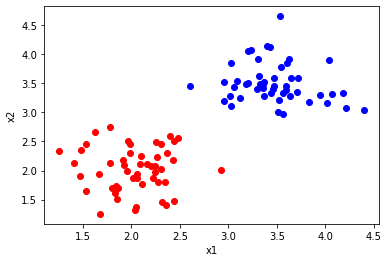

In [22]:
def func_normal(mean, std, label, dim=2, N=50):
    xc = np.random.normal(loc=mean, scale=std, size=(N, len(mean)))
    data_xc = pd.DataFrame(xc, columns=['x1','x2'])
    data_xc['y'] = label
    return data_xc
    
def plot_func(data):
    t_class0 = data['y'] == -1
    t_class1 = data['y'] == 1

    fig, ax = plt.subplots()

    ax.scatter(data.loc[t_class0, 'x1'],
                data.loc[t_class0, 'x2'], color='red')
    ax.scatter(data.loc[t_class1, 'x1'], data.loc[t_class1, 'x2'], color='blue')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    return fig, ax

data_c1 = func_normal([2,2], [0.4, 0.4], -1)
data_c2 = func_normal([3.5,3.5], [0.4, 0.4], 1)

data = pd.concat([data_c1, data_c2], ignore_index=True)
fig, ax = plot_func(data)
fig.show()

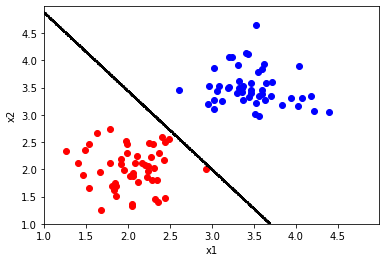

In [31]:
y_train = data['y'].to_numpy()
x_train = data[['x1', 'x2']].to_numpy()
fig, ax = plot_func(data)

for i in range(10):
    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)

    x = np.arange(1, 5, step=0.01)
    y = np.arange(1, 5, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_dec = perceptron.predict(grid)
    zz = y_dec.reshape(xx.shape)

    ax.contour(xx, yy, zz, colors=['black'])

fig.show()



In [ ]:
fig, ax = plot_func(data)
for i in range(10):
    svm = LinearSVC()
    svm.fit(x_train, y_train)

    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)

    x = np.arange(1, 5, step=0.01)
    y = np.arange(1, 5, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_per = perceptron.predict(grid)
    y_svm = svm.predict(grid)
    
    zz_per = y_per.reshape(xx.shape)
    zz_svm = y_svm.reshape(xx.shape)

    #ax.contour(xx, yy, zz_per, colors=['black'])
    ax.contour(xx, yy, zz_svm, colors=['green'])


fig.show()


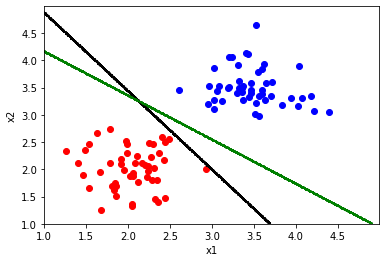

In [34]:
fig, ax = plot_func(data)
for i in range(10):
    svm = LinearSVC()
    svm.fit(x_train, y_train)

    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)

    x = np.arange(1, 5, step=0.01)
    y = np.arange(1, 5, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_per = perceptron.predict(grid)
    y_svm = svm.predict(grid)
    
    zz_per = y_per.reshape(xx.shape)
    zz_svm = y_svm.reshape(xx.shape)

    ax.contour(xx, yy, zz_per, colors=['black'])
    ax.contour(xx, yy, zz_svm, colors=['green'])


fig.show()


In [ ]:
def plot_decision_boundary(data, plot_error=False):
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    x = np.arange(0, 6, step=0.1)
    y = np.arange(0, 6, step=0.1)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # train the model
    model = LinearPerceptron()
    y_train = data['y'].to_numpy()
    x_train = data[['x1', 'x2']].to_numpy()
   
    w, e, wk = model.train(x_train, y_train)

    # make predictions for the grid
    _, yhat = model.predict(grid, w)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    ax1.contourf(xx, yy, zz, cmap='Set2')
   
    t_class0 = data['y'] == -1
    t_class1 = data['y'] == 1
    ax1.scatter(data.loc[t_class0, 'x1'],
                data.loc[t_class0, 'x2'], color='red')
    ax1.scatter(data.loc[t_class1, 'x1'], data.loc[t_class1, 'x2'], color='blue')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')

    surf = ax2.plot_surface(xx, yy, zz, cmap='jet')
    #fig.colorbar(surf, ax=ax2)

    fig.show()

    # calculate training error
    if(plot_error == True):
        fig, ax = plt.subplots()
        ax.plot(e)
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Error')

    # print final training error
    print(f'Model Accuracy: {100 * np.sum(y_train == model.predict(x_train, w))/len(y_train)} %')

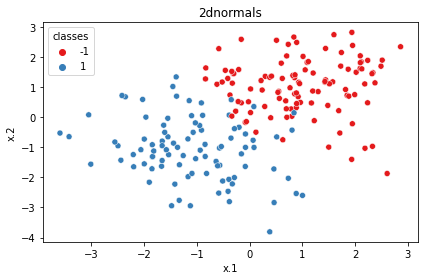

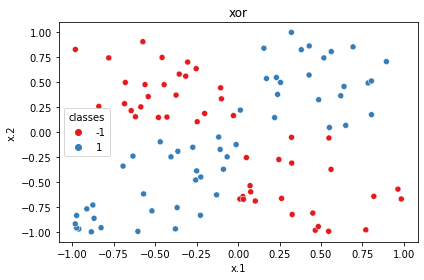

In [5]:
# plot the functions
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=normals, x="x.1", y="x.2", hue='classes', ax=ax, palette='Set1')
ax.set_title('2dnormals')
fig.tight_layout()
fig.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=xor, x="x.1", y="x.2", hue='classes', ax=ax,palette='Set1')
ax.set_title('xor')
fig.tight_layout()
fig.show()